In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Dataset/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [48]:
#visualizing how linear is teh area for sale price 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df[['area']].values
y = df['price'].values  #1D array



(545,)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df.replace({'yes':1, 'no':0}, inplace = True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_21824\4191213634.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes':1, 'no':0}, inplace = True)


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['furnishingstatus'] = label_encoder.fit_transform(df['furnishingstatus'])  # Example column


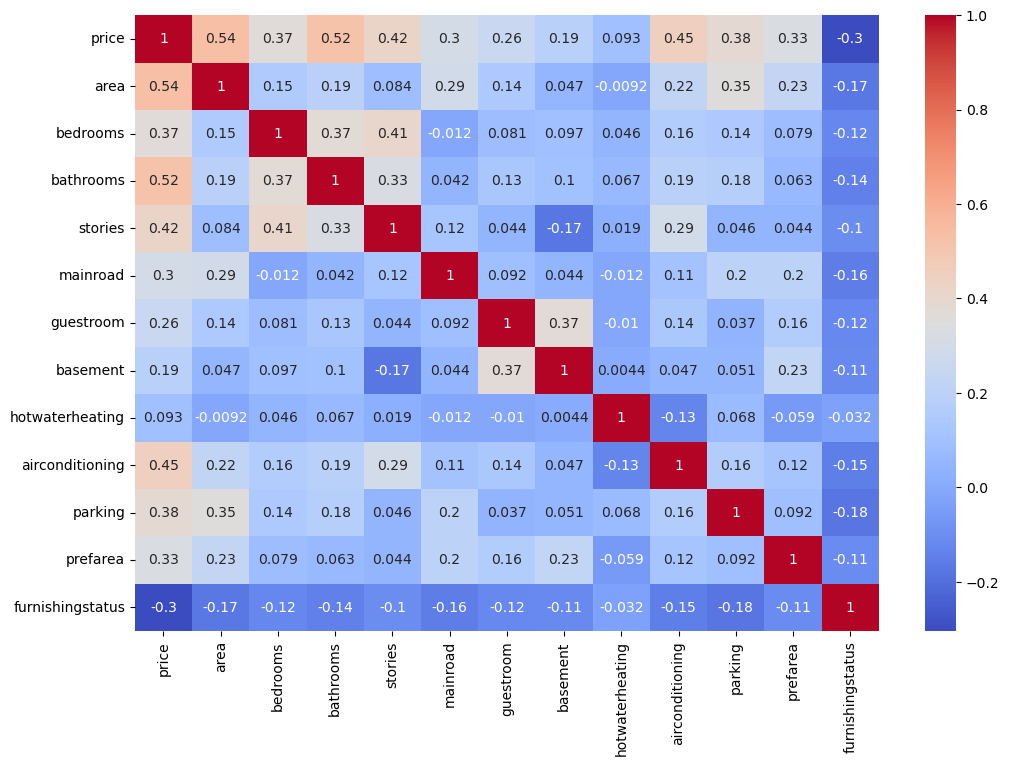

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [13]:
#select the most important features 
from sklearn.feature_selection import SelectKBest, f_regression

#extract the feature columns
X = df.drop(columns=['price']) 
#extract the target columns
y = df['price'] 

selector = SelectKBest(score_func=f_regression, k=10) #select the best 10 features that contribites to predicting y
X_new = selector.fit_transform(X, y)
X_new

array([[7420,    4,    2, ...,    2,    1,    0],
       [8960,    4,    4, ...,    3,    0,    0],
       [9960,    3,    2, ...,    2,    1,    1],
       ...,
       [3620,    2,    1, ...,    0,    0,    2],
       [2910,    3,    1, ...,    0,    0,    0],
       [3850,    3,    1, ...,    0,    0,    2]], dtype=int64)

In [14]:
#Train-Test Split 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_new,y, test_size=0.2, random_state=42)

In [15]:
#Normalize Data --> reducing numerical differences between various data for easy visualizing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#this is basically done to ensure the consistency 
X_train = scaler.fit_transform(X_train) #Compute Mean (μ) and Std Dev (σ) for X_train
X_test = scaler.transform(X_test) #Use the same μ maen and σ standard deviation to scale X_test:



In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([4974005.62656182, 7399005.66957556, 3205110.54642989,
       4646823.57417243, 3546334.81886638, 3684207.56860096,
       5823588.35164653, 6473189.53564642, 3060053.20439411,
       2891463.30021779, 9710960.44836917, 2936903.41084995,
       3283309.39196349, 3082787.78943707, 3405018.28491014,
       5660193.84440554, 3087005.981728  , 4868905.64938067,
       4070912.52738484, 3649795.12279367, 5774102.93396571,
       5803835.02787842, 2872242.64336848, 4693494.82576264,
       4993571.83265106, 7309880.7794357 , 3155664.02694095,
       5229042.94238966, 7907555.44487396, 3558043.73530245,
       6242917.6846174 , 3451530.43887814, 7018374.14173405,
       4249273.45078991, 3702873.38869347, 5940966.84845817,
       4691514.30920934, 4104961.109794  , 3344075.01498144,
       4885687.08253639, 4692954.20647518, 3631893.06464723,
       7380855.27870357, 4184876.45099914, 3819955.03721859,
       4382867.26433438, 6708699.43680287, 4155762.52875445,
       3870741.02121389,

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 987959.4292396447
MSE: 1841065352052.3416
R2 Score: 0.6357622384656214


In [20]:
import numpy as np

new_house = np.array([[3500, 3,2,2,1,1,0,1,1,1]]) 

# Ensure the input is scaled using the same scaler as training data
new_house_scaled = scaler.transform(new_house)

predict_price = model.predict(new_house_scaled)

predict_price

array([6015123.89933002])